# Rapport Modélisation Vélib

#### Groupe : 
- Anna van Elst
- Vincent Papegay-Vallet

### **Librairies utilisées**

In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from random import expovariate


### **Données de simulation**

Soit $I = \{3,4,5,6,7\}$ l’ensemble des stations et $N_s  = 5 $ le nombre de stations.
On note  $n_{ii}$ le nombre de vélos dans chaque station $i$, où $i$ est l'index de la station dans $I$. On a les données initiales du nombre de vélos dans chaque station. On note $n_{t_{ij}}$ le nombre de vélos en train de faire le trajet de la station i vers la station j. On en déduit une matrice $E$  de taille $5 \times 5$ du nombre de vélos dans les 25 colonies. 

Avant de lancer la simulation, il faudra décommenter le code associé à la matrice $E$ initiale choisie (données réelles, 1 vélib, 100 vélib). 



In [ ]:
# stations et nombre de stations
I = [3,4,5,6,7]
n_s = len(I)

# Les coefficients diagonaux sont les nombres de vélos stationnés et les coefficients i,j représentent les vélos en transit

# données réelles 
#E_init = np.diag([20, 15, 17, 13, 18]) + np.array([[0, 1, 0, 0, 0], [1, 0, 1, 0, 0], [0, 1, 0, 1, 0], [0, 0, 1, 0, 1], [0, 0, 0, 1, 0]])

#données tests pour un vélib
#E_init = np.diag([1, 0, 0, 0, 0])
#E_init = np.diag([0, 1, 0, 0, 0])
#E_init = np.diag([0,0, 1, 0, 0])
#E_init = np.diag([0, 0, 0, 1, 0])
#E_init = np.diag([0, 0, 0, 0, 1])

#donnée tests pour 100 vélibs répartis uniformément
E_init = np.ones((5,5))*4
#E_init = np.ones((5,5))*2

print("La matrice initiale est : \n",E_init)
print("Nombre de velibs : ",np.sum(E_init))

La matrice initiale est : 
 [[4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4.]]
Nombre de velibs :  100.0


A partir des données, nous pouvons définir : 
- Temps moyen de trajet $\tau_{i,j}$ en minutes
- Matrice de routage $P = (p_{i,j})$.
- Taux de départ.

In [ ]:
# On calcule ici le temps moyen de trajet en secondes
tau = np.array([[np.inf , 3, 5, 7, 7], [2, np.inf, 2, 5, 5], [4, 2, np.inf, 3, 3], [8, 6, 4, np.inf, 2], [7, 7, 5, 2, np.inf]]) * 60
print("Le temps moyen en secondes est : \n",tau)

#On définit la matrice de routage
P = np.array([[0, 0.22, 0.32, 0.2, 0.26],[0.17, 0, 0.34, 0.21, 0.28],[0.19, 0.26, 0, 0.24, 0.31],[0.17, 0.22, 0.33, 0, 0.28], [0.18, 0.24, 0.35, 0.23, 0]])
print("\nLa matrice de routage est : \n",P)

# Le taux de l'énoncé est divisé par 3600 pour obtenir un taux de départ par seconde
taux_depart = np.diag([2.8, 3.7, 5.5, 3.5, 4.6]) / 3600
print("\nLe taux de départ en secondes est : \n", taux_depart)

Le temps moyen en secondes est : 
 [[ inf 180. 300. 420. 420.]
 [120.  inf 120. 300. 300.]
 [240. 120.  inf 180. 180.]
 [480. 360. 240.  inf 120.]
 [420. 420. 300. 120.  inf]]

La matrice de routage est : 
 [[0.   0.22 0.32 0.2  0.26]
 [0.17 0.   0.34 0.21 0.28]
 [0.19 0.26 0.   0.24 0.31]
 [0.17 0.22 0.33 0.   0.28]
 [0.18 0.24 0.35 0.23 0.  ]]

Le taux de départ en secondes est : 
 [[0.00077778 0.         0.         0.         0.        ]
 [0.         0.00102778 0.         0.         0.        ]
 [0.         0.         0.00152778 0.         0.        ]
 [0.         0.         0.         0.00097222 0.        ]
 [0.         0.         0.         0.         0.00127778]]


Nous devons maintenant calculer 
- $\phi_j(n_j) = n_j $ pour pour les taux d'arrivée 
- $\phi_j(n_j) = \mathbb{1}_{\{n_j \neq 0\}} $ pour les taux de départ 
- $\lambda_{t_{ij}j} = \frac{1}{\tau_{i,j}}$ (lambda d'arrivée) 
- $\lambda_{it_{ij}}$ (lambda de départ

In [ ]:
#on définit une fonction indicatrice
def indicatrice(E):
  return np.array(E > 0, dtype=int)

#on calcule phi_depart_init
phi_depart_init = indicatrice(np.diag(E_init.copy()))
print("Phi_init de départ vaut : \n", np.diag(phi_depart_init))

#on calcule phi_arrive_init
phi_arrive_init = E_init.copy()
print("\nPhi_init d'arrivée vaut : \n", phi_arrive_init)

#on calcule les lambdas d'arrivée
lambdas_arrivee = 1 / tau
print("\nLambdas d'arrivée : \n", lambdas_arrivee)

#on calcule les lambdas de départ
lambdas_depart = taux_depart @ P
print("\nLambdas de départ : \n", lambdas_depart)

Phi_init de départ vaut : 
 [[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]

Phi_init d'arrivée vaut : 
 [[4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4.]]

Lambdas d'arrivée : 
 [[0.         0.00555556 0.00333333 0.00238095 0.00238095]
 [0.00833333 0.         0.00833333 0.00333333 0.00333333]
 [0.00416667 0.00833333 0.         0.00555556 0.00555556]
 [0.00208333 0.00277778 0.00416667 0.         0.00833333]
 [0.00238095 0.00238095 0.00333333 0.00833333 0.        ]]

Lambdas de départ : 
 [[0.         0.00017111 0.00024889 0.00015556 0.00020222]
 [0.00017472 0.         0.00034944 0.00021583 0.00028778]
 [0.00029028 0.00039722 0.         0.00036667 0.00047361]
 [0.00016528 0.00021389 0.00032083 0.         0.00027222]
 [0.00023    0.00030667 0.00044722 0.00029389 0.        ]]


Nous souhaitons maintenant calculer les matrices des taux de transitions :

In [ ]:
#fonction pour calculer Q_depart = lambda_depart_i,j * phi_i
def calcul_Q_depart(E, lambdas=lambdas_depart):
  phi_depart = np.diag(indicatrice(np.diag(E.copy())))
  return  phi_depart @ lambdas  

Q_depart_init = calcul_Q_depart(E_init)
print("La matrice de taux de transition de départ est : \n",Q_depart_init)

#fonction pour calculer Q_arrive = lambda_arrive_i,j * phi_i_j
def calcul_Q_arrivee(E, lambdas=lambdas_arrivee):
  phi = E.copy()
  return lambdas * phi

Q_arrivee_init = calcul_Q_arrivee(E_init)
print("\nLa matrice de taux de transition d'arrivé est : \n",Q_arrivee_init)

La matrice de taux de transition de départ est : 
 [[0.         0.00017111 0.00024889 0.00015556 0.00020222]
 [0.00017472 0.         0.00034944 0.00021583 0.00028778]
 [0.00029028 0.00039722 0.         0.00036667 0.00047361]
 [0.00016528 0.00021389 0.00032083 0.         0.00027222]
 [0.00023    0.00030667 0.00044722 0.00029389 0.        ]]

La matrice de taux de transition d'arrivé est : 
 [[0.         0.02222222 0.01333333 0.00952381 0.00952381]
 [0.03333333 0.         0.03333333 0.01333333 0.01333333]
 [0.01666667 0.03333333 0.         0.02222222 0.02222222]
 [0.00833333 0.01111111 0.01666667 0.         0.03333333]
 [0.00952381 0.00952381 0.01333333 0.03333333 0.        ]]


## **Q1. Simulez les trajectoires du processus de Markov**

### Début simulation

In [ ]:
#on calcule la somme de tous les q_i
def calcul_somme_lambda(Q1, Q2):
  return Q1.sum() + Q2.sum() 

#on construit l'exponentielle des taux de transition * t
def construit_exp(Q1, Q2, t):
  n = 5
  exp = np.zeros(2 * n ** 2)
  for i in range(n):
    for j in range(n):
      #bijection de 0 à 24
      exp[i * n + j] = m.exp(-Q1[i][j] * t)
  for i in range(n):
    for j in range(n):
      #bijection de 25 à 49
      exp[n ** 2 + i * n + j] = m.exp(-Q2[i][j] * t)
  return exp

In [ ]:
#temps = np.zeros(50) 
#on calcule la liste des probabilités pour t=100
proba = 1 - construit_exp(Q_depart_init, Q_arrivee_init, 100)
#on normalise pour pouvoir réaliser un tirage
proba /= proba.sum()
print("La liste des probabilités normalisée est : \n",proba)
#On tire un élement entre 0 et 49 avec probabilité proba
x = np.random.choice(50, 1, p=proba)
print("\nL'élément tiré est : ",x)
print("Sa probabilité est : ", proba[x])

La liste des probabilités normalisée est : 
 [0.         0.00104038 0.00150742 0.00094653 0.00122763 0.00106214
 0.         0.00210589 0.00130937 0.00173959 0.00175448 0.00238814
 0.         0.00220778 0.00283662 0.0010052  0.0012977  0.00193622
 0.         0.00164683 0.00139433 0.00185203 0.00268207 0.00177599
 0.         0.         0.05467744 0.04515835 0.03766321 0.03766321
 0.05913525 0.         0.05913525 0.04515835 0.04515835 0.04974049
 0.05913525 0.         0.05467744 0.05467744 0.03467207 0.04113582
 0.04974049 0.         0.05913525 0.03766321 0.03766321 0.04515835
 0.05913525 0.        ]

L'élément tiré est :  [36]
Sa probabilité est :  [0.05913525]


### Simulation

In [ ]:
def tour(Etat, Q_depart, Q_arrivee, l_t):
  E = Etat.copy()
  #mis à jour des matrices de transition
  Q1 = calcul_Q_depart(E)
  Q2 = calcul_Q_arrivee(E)
  # Paramètre pour la loi exponentielle du minimum des temps d'attente
  l = calcul_somme_lambda(Q1, Q2)
  # On tire un temps aléatoire avec comme loi une exponentielle de paramètre la somme des lambdas
  t = expovariate(l)
  if (l_t != []):
    l_t.append(t + l_t[-1])
  else:
    l_t.append(t)
  # on calcule la liste des probabilités pour temps = t
  proba = 1 - construit_exp(Q1, Q2, t)
  #on normalise pour pouvoir réaliser un tirage
  proba = proba / proba.sum()
  # On tire un élement entre 0 et 49 avec probabilité proba
  if proba.all() >=0 : 
    x = np.random.choice(50, 1, p=proba)[0]
  else : 
    print("proba negative ???")
  if x >= 25:
    x -= 25
    #si le nombre est entre 25 et 49 on a une arrivée
    depart = 0
  else : 
    #si le nombre est entre 0 et 24 on a un départ
    depart = 1
  
  #on récupère j par bijection comme il est le reste de la division par 5 
  j = x % 5 
  #on récupère i comme il est le quotient
  i = (x - j) // 5
  if depart:
    
    if E[i,i] <= 0 : 
      #evenement impossible
      print("Cet evenement n'est pas possible car il n'y plus de vélo dans la station")
    else : 
      #le velib quitte la station et se retrouve en transition
      E[i][i] -= 1
      E[i][j] += 1
  else :
    if E[i,j] <= 0 :
      #evenement impossible
      print("C'est evenements n'est pas possible car il n'y pas de vélo en transition")
    #le velib alors en transition arrive en station
    else : 
      E[i][j] -= 1
      E[j][j] += 1
  return E, Q1, Q2, l_t

In [ ]:
def simulation(T):
  # Initialisation des différentes variables
  E = E_init.copy()
  Q_depart = Q_depart_init.copy()
  Q_arrivee = Q_arrivee_init.copy()
  l_t = [0]
  s0 = []
  s1 = []
  s2 = []
  s3 = []
  s4 = []
  i = 1
  s0.append(E[0][0])
  s1.append(E[1][1])
  s2.append(E[2][2])
  s3.append(E[3][3])
  s4.append(E[4][4])
  # tour de calcul 
  while(i > 0 or l_t[-1] < T):
    i -= 1
    #on ajoute le nombre de velib dans chaque liste associée
    E, Q_depart, Q_arrivee, l_t = tour(E, Q_depart, Q_arrivee, l_t)
    s0.append(E[0][0])
    s1.append(E[1][1])
    s2.append(E[2][2])
    s3.append(E[3][3])
    s4.append(E[4][4])
  return s0, s1, s2, s3, s4, E, l_t

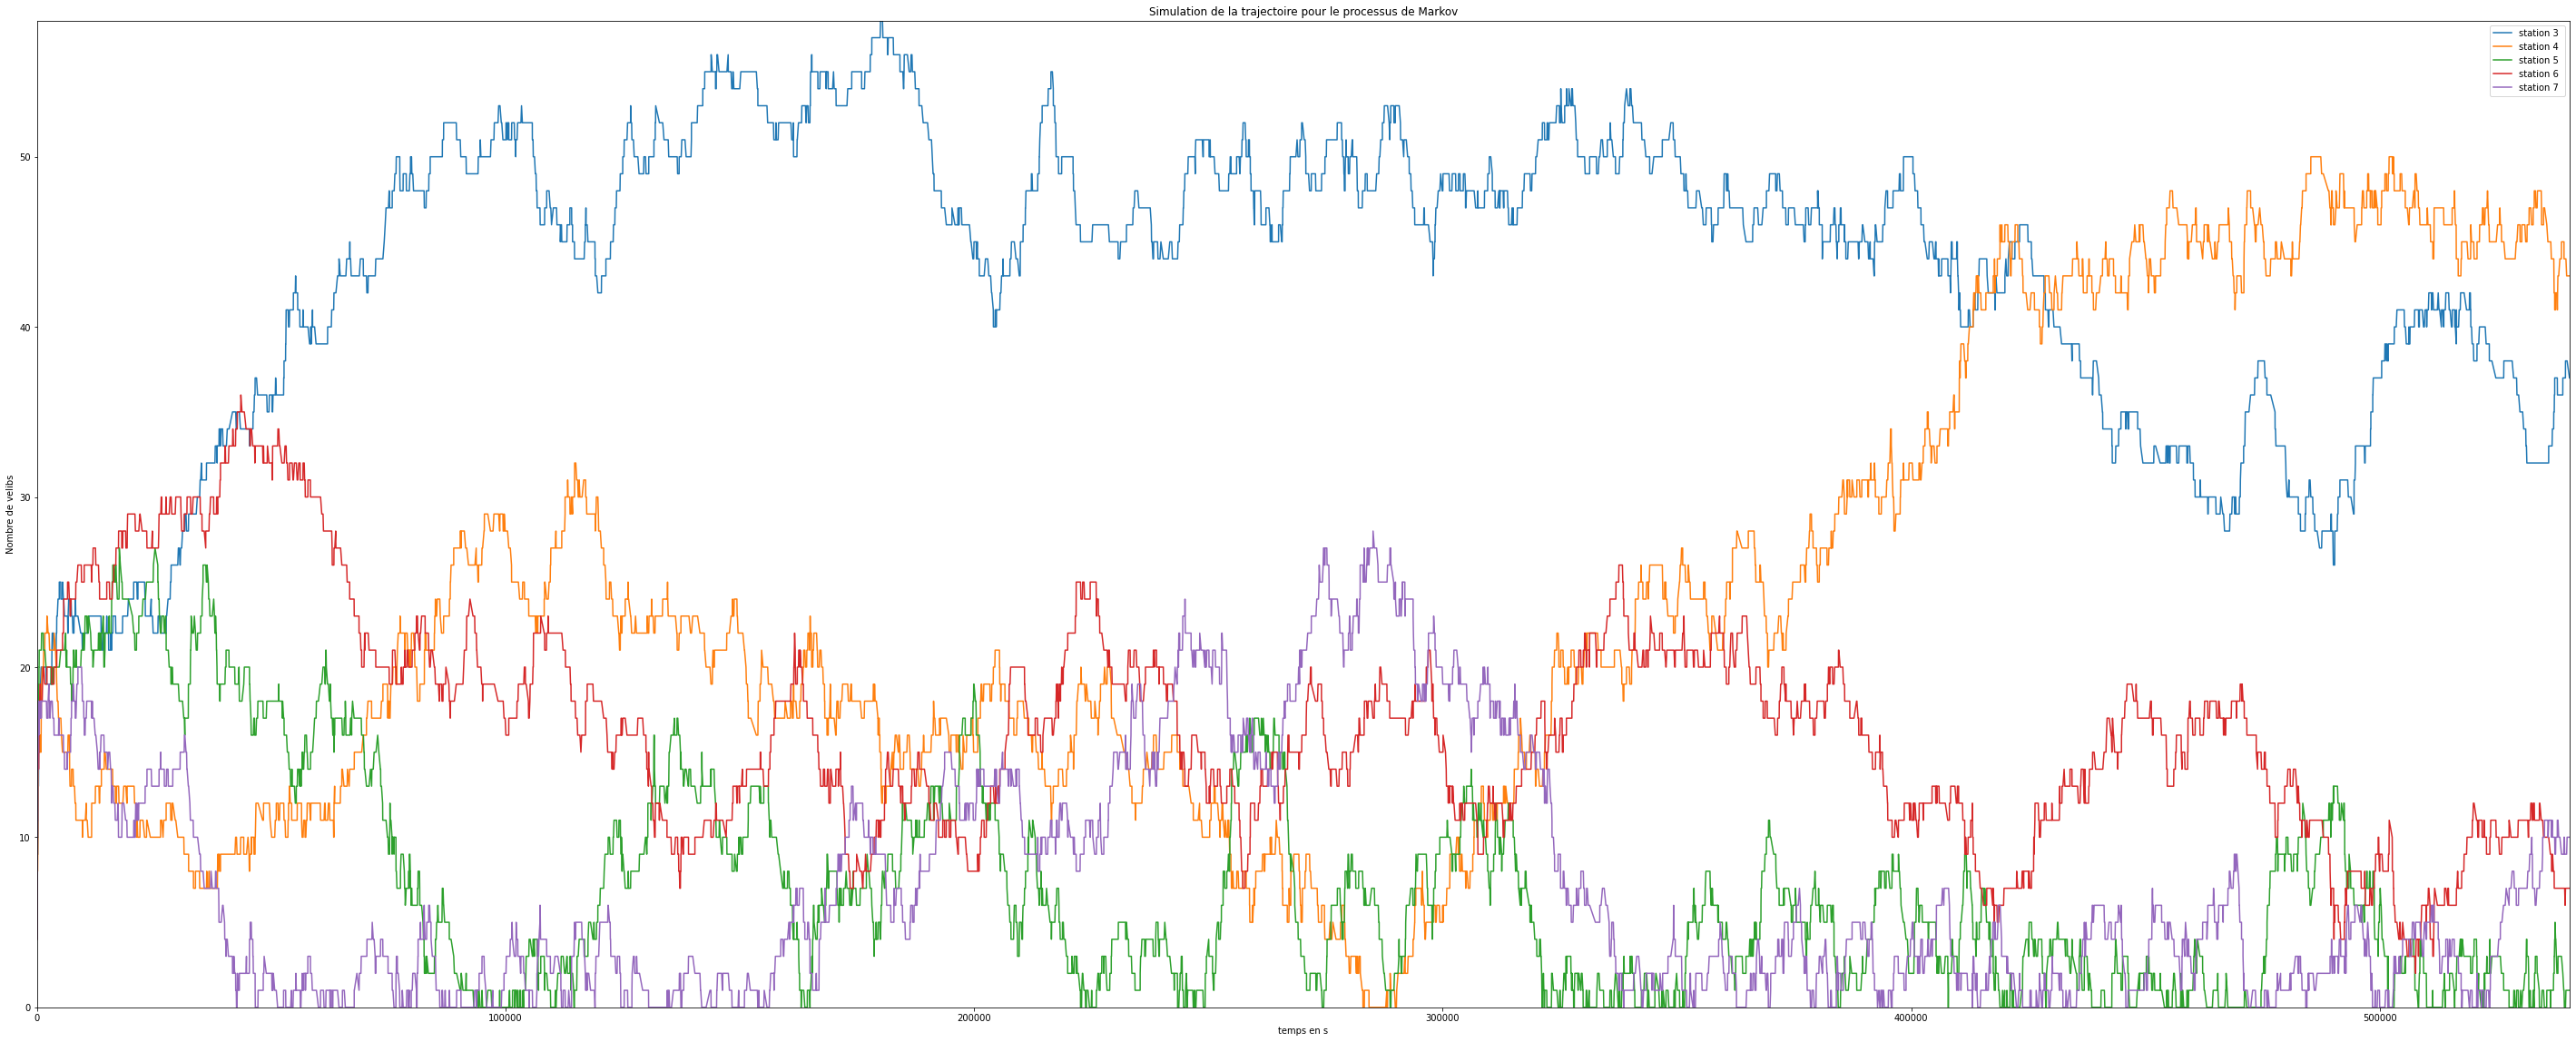

Le total de velib en station est :  98.0


In [ ]:
s0, s1, s2, s3, s4, E, l_t = simulation(T=3600 * 150)
plt.figure(figsize = (50,20))
plt.plot(l_t, s0, label="station 3 ") 
plt.plot(l_t, s1, label="station 4 ") 
plt.plot(l_t, s2, label="station 5 ") 
plt.plot(l_t, s3, label="station 6 ") 
plt.plot(l_t, s4, label="station 7 ") 
tot = [*s0,*s1,*s2,*s3,*s4]
plt.ylim([0, max(tot)+0.01])
plt.xlim([0, max(l_t)+0.5])
plt.xlabel("temps en s")
plt.ylabel("Nombre de velibs")
plt.legend()
plt.title("Simulation de la trajectoire pour le processus de Markov")
plt.show() 
print("Le total de velib en station est : ", np.sum([E[i,i] for i in range(5)]))

## **Q2. En déduire la probabilité que chaque station soit vide après 150 heures**

Comme nous souhaitons estimer la probabilité que chaque station soit vide après 150 heures. Pour chaque station, cela revient donc à effectuer n tirages $X_{1}, \ldots, X_{n}$ où X vaut 1 si la station est vide et 0 sinon. Comme X suit une loi de Bernoulli de paramètre p où p est la probabilité que la station soit vide, $p = E[X]$ et on peut estimer cette probabilité $p$ par 
$$\hat p = \frac{1}{n}  \sum_{i=1}^{n} X_i .$$ 

In [ ]:
#array pour compter le nombre de fois où la station est vide
proba_n = np.zeros(5)
#nombre de tirages
n = 100
for i in range(n):
  s0, s1, s2, s3, s4, E, l_t = simulation(T=3600 * 150)
  for j in range(5):
      if E[j,j] == 0 :
        proba_n[j] +=1
proba_n = proba_n/n


In [ ]:
for i in range(5):
  print("La probabilité que la station "+str(i+3)+" soit vide après 150h est : ", proba_n[i])

La probabilité que la station 3 soit vide après 150h est :  0.01
La probabilité que la station 4 soit vide après 150h est :  0.01
La probabilité que la station 5 soit vide après 150h est :  0.18
La probabilité que la station 6 soit vide après 150h est :  0.04
La probabilité que la station 7 soit vide après 150h est :  0.1


In [ ]:
#pour calculer la probabilité stationnaire
proba_autre = [[] for i in range(5)]
#nombre de tirages
n = 100
for i in range(n):
  s0, s1, s2, s3, s4, E, l_t = simulation(T=3600 * 150)
  l = [s0, s1, s2, s3, s4]
  i = 0
  for x in l : 
    proba_autre[i].append(x.count(0)/len(x))
    i+=1
result = [np.mean(x) for x in proba_autre]
print("Les probabilités pour chaque station sont : \n",result)

Les probabilités pour chaque station sont : 
 [0.00560917903351943, 0.017527777125584433, 0.09972314065997594, 0.017877113668378762, 0.06341714403080098]


## **Q3. Calculer l’intervalle de confiance de ce résultat.**

D'après le rappel, l'intervalle de confiance d'une quantité $p =\mathbf{E}[X]$ estimée sur $n$ tirages $X_{1}, \ldots, X_{n}$ de moyenne $\hat{p}_{n}=\frac{1}{n} \sum_{i=1}^{n} X_{i}$ est l'intervalle de la forme $\left[\hat{p}_{n}-\varepsilon, \hat{p}_{n}+\varepsilon\right]$ dans lequel on est sûr à $\alpha \%$ que se trouve $\theta$. 

On a $\varepsilon=\beta \sigma_{n} / \sqrt{n}$ avec :

- $\sigma_{n}$ l'écart-type empririque sur les tirages :
$$
\sigma_{n}^{2}=\frac{n}{n-1}\left(\hat{p}_{n}-\hat{p}_{n}^{2}\right) .
$$
- $\beta=1,96$ pour $\alpha=0,95 .$

In [ ]:
def sigma(p, n):
  r = n/(n-1)
  diff = p - p**2
  return np.sqrt(r*diff)

In [ ]:
def epsilon(sigma_n,n,beta=1.96):
  return (beta*sigma_n)/np.sqrt(n)

In [ ]:
def intervalle(p,epsilon_n) : 
  low = p - epsilon_n
  up = p + epsilon_n
  int_conf = np.transpose([low,up])
  return int_conf

In [ ]:
#on calcule sigma
sigma_n = sigma(proba_n,n)
#on calcule epsilon
epsilon_n = epsilon(sigma_n,n)
#intervalle de confiance
int_conf = intervalle(proba_n,epsilon_n)
for i in range(5):
  print("L'intervalle de confiance de la station "+str(i+3)+" est : ", int_conf[i])


L'intervalle de confiance de la station 3 est :  [-0.0096  0.0296]
L'intervalle de confiance de la station 4 est :  [-0.0096  0.0296]
L'intervalle de confiance de la station 5 est :  [0.10431991 0.25568009]
L'intervalle de confiance de la station 6 est :  [0.00139851 0.07860149]
L'intervalle de confiance de la station 7 est :  [0.04090378 0.15909622]


## **Q4. Utilisez les équations de trafic pour obtenir les relations entre les $\alpha_i$**

Les équations de trafic sont données par : 
$$
\begin{gathered}
\alpha_{j}>0, \quad \sum_{j} \alpha_{j}=1, \\
\alpha_{j} \sum_{k} \lambda_{j k}=\sum_{k} \alpha_{k} \lambda_{k j}, \quad j=1,2, \ldots, |J| .
\end{gathered}
$$
où J est l'ensemble des entiers représentants les colonies (états en station et en transition).


Nous avons un total de 25 colonies donc $|J|=25$ et 50 paramètres lambdas. Dans notre code, nous avions utilisés une bijection entre $\{1,\ldots ,50\}$ et et nos paramètres $ \lambda $, mais pour simplifier les notations, nous reprendrons les notations du corrigé Modélisation ( $t_{i,j} $ ) pour les index des colonies et la stations velib $i$ sera représentée par $t_{ii}$. Cela nous permet d'indexer de manière claire des 25 colonies. Les $\alpha_i$ de la question sont donc représentés par $\alpha_{t_{i,i}}$. Les $\lambda$ de départ seront représentés par $\lambda_{t_{i,i},t_{i,j} }$ et les $\lambda$ d'arrivé par $\lambda_{t_{i,j},t_{j,j} }$ (nous en avons bien 25 de chaque). Pour $i=j$, chaque $\lambda$ = 0 donc cela ne gêne pas dans les calculs. Nous notons $N$ le nombre de stations (ici, $N=5$).
Avec ces nouvelles notations, nous avons donc 
$$
\begin{gathered}
\alpha_{t_{i,j}}>0, \quad \sum_{k,l} \alpha_{t_{k,l}}=1, \\
\alpha_{t_{i,j}} \sum_{k \in J} \lambda_{t_{i,j}, k}=\sum_{k \in J} \alpha_{k} \lambda_{k, t_{i,j}}, \quad t_{i,j} \in J .
\end{gathered}
$$ 

Comme pour $ i \neq j $ les seuls $\lambda$ possibles sont de la forme $\lambda_{t_{i,i},t_{i,j} }$ et $\lambda_{t_{i,j},t_{j,j} }$, nous en déduisons 
- $$\sum_{k \in J} \lambda_{t_{i,j}, k} = \lambda_{t_{i,j}, t_{j,j}}$$
- $$ \sum_{k \in J} \alpha_{k} \lambda_{k, t_{i,j}} = \alpha_{t_{i,i}} \lambda_{t_{i,i}, t_{i,j}} $$
donc 
$$ \alpha_{t_{i,j}} \lambda_{t_{i,j}, t_{j,j}} = \alpha_{t_{i,i}} \lambda_{t_{i,i}, t_{i,j}} .$$ 

Finalement, pour $i \neq j$, comme $\lambda_{t_{i,j}, t_{j,j}} \neq 0$, nous avons donc 
$$ \alpha_{t_{i,j}} = \frac{\alpha_{t_{i,i}} \lambda_{t_{i,i}, t_{i,j}}}{ \lambda_{t_{i,j}, t_{j,j}}} . $$ 

Pour $i=j$, nous avons
$$ \alpha_{t_{i,i}} \sum_{k \neq i} \lambda_{t_{i,i}, t_{i,k}}=\sum_{j \neq i} \alpha_{t_{j,i}} \lambda_{t_{j,i}, t_{i,i}} .$$

Or, en remplaçant $ \alpha_{t_{j,i}} $ par son expression, nous obtenons 
$$ \alpha_{t_{i,i}} \sum_{k=1, k \neq i}^{N} \lambda_{t_{i,i}, t_{i,k}}=\sum_{j=1, j \neq i}^{N} \alpha_{t_{j,j}} \lambda_{t_{j,j}, t_{j,i}} .$$

De plus, nous avons également la condition de normalisation 
$$  \sum_{k,l} \alpha_{t_{k,l}}=1 ,$$
donc en posant $ \beta_{i,j} = \frac{ \lambda_{t_{i,i}, t_{i,j}}}{ \lambda_{t_{i,j}, t_{j,j}}} $, nous avons
$$  \sum_{i \neq j} \alpha_{t_{i,i}} \beta_{i,j} + \sum_{i} \alpha_{t_{i,i}}  =1 $$ ce qui nous donne une autre équation en $\alpha_{t_{i,i}}$.

En posant $\alpha_{t_{i,i}} = \alpha_i $, $\gamma_i = \sum_{k \neq i} \lambda_{t_{i,i}, t_{i,k}} $, $\gamma_{j,i} =  -\lambda_{t_{j,j}, t_{j,i}} $ on a 6 équations en $\alpha_i$ :

$$ \left\{\begin{array}{l} 
\alpha_{i} \gamma_i + \sum_{ j \neq i} \alpha_{j} \gamma_{j,i} = 0 , \quad \forall i \in \{1,\ldots,5\} \\
  \sum_{i \neq j} \alpha_{t_{i,i}} \beta_{i,j} + \sum_{i} \alpha_{t_{i,i}}  =1 \end{array}\right.$$

Comme suggéré par l'énoncé, nous allons mettre le système sous forme de calcul matriciel $M \alpha=X$ où $\alpha$ est le vecteur colonne des $\alpha_{i}$. Nous pouvons effectivement résoudre le système car nous avons $6$ équations pour $5$ inconnues. On a alors $\alpha=M^{-1} X$. Pour éviter $X=0$, nous garderons l'équation de la normalisation. Cette dernière peut se réécrire :
$$ \sum_{i} \alpha_{t_{i,i}} \left( \sum_{j \neq i} \beta_{i,j} +1 \right)=1 $$ 
et en posant $ \beta_i = \left( \sum_{j \neq i} \beta_{i,j} +1 \right)$, 
nous avons l'équation :
$$ \sum_{i} \alpha_{i} \beta_i = 1.$$

Ainsi, nous devons résoudre 
$$ M \alpha = X $$ 

avec 
$
M=\left(\begin{array}{ccccc}
 \beta_1 & \beta_2 & \beta_3 & \beta_4 & \beta_5 \\
\gamma_1 & \gamma_{2,1} & \gamma_{3,1} & \gamma_{4,1} & \gamma_{5,1}  \\
 \gamma_{1,2} & \gamma_2 & \gamma_{3,2} & \gamma_{4,2} & \gamma_{5,2}\\
\gamma_{1,3} & \gamma_{2,3}& \gamma_3 & \gamma_{4,3} & \gamma_{5,3}\\
\gamma_{1,4} & \gamma_{2,4} & \gamma_{3,4} & \gamma_4& \gamma_{5,4}
\end{array}\right)
$,
$
X=\left(\begin{array}{c}
1 \\
0 \\
0 \\
0 \\
0 
\end{array}\right)
$,
$
\alpha =\left(\begin{array}{c}
\alpha_1 \\
\alpha_2 \\
\alpha_3 \\
\alpha_4 \\
\alpha_5
\end{array}\right)
$ où les $\alpha_i$ sont associés aux station.



## **Q5. On considère qu’il n’y a qu’un seul vélo, quelle est alors la taille de l’espace d’état ?**

Si le modélisation se réduit à un seul vélo, comme nous avons 25 colonies et que le vélo ne peut appartenir qu'à une seule colonie, nous avons un total de 25 états. Afin de simplifier les calculs, nous avons choisi de considérer seulement 6 états :
- $e_0 = (1,0,0,0,0,0,0)$ pour l'état le vélo est en transition
- $e_i = (0,\ldots,i,\ldots,0)$ pour l'état le vélo se trouve à la station $i \in \{1,\ldots,5\}.$

## **Q6. Dans ces conditions (un seul vélo), calculer la probabilité que chaque station soit vide.**

D'après le théorème du cours sur les colonies, la distribution stationnaires pour un processus à migration fermée est donné par
$$
\pi(n)=G_{N}^{-1} \prod_{j=1}^{J} \frac{\alpha_{j}^{n_{j}}}{\prod_{r=1}^{n_{j}} \phi_{j}(r)}, \quad n \in S = \{e_0,\ldots,e_5\} .
$$
où $G_{N}$ est une constante de normalisation.

L'expression de $\pi$ se simplifie immédiatement car, comme nous n'avons qu'un seul vélo, 
$$\prod_{r=1}^{n_{j}} \phi_{j}(r) = 1. $$

De même, l'expression se simplifie car le vélo ne peut être qu'à un seul endroit possible : 

$$ \pi(e_i)=G_{N}^{-1} \prod_{j=1}^{J} \alpha_{j}^{n_{j}} = G_{N}^{-1} \alpha_{i}^{n_{i}} = G_{N}^{-1} \alpha_{i}. $$

Or, comme $\pi(e_i)$ représente la probabilité pour que la vélo se trouve à la station $i$, la probabilité $p_i$ que la station $i$ soit vide vaut donc $1 - \pi(e_i)$.

Finalement, $p_i = 1 - G_{N}^{-1} \alpha_{i}, \quad \forall i \in \{1,\ldots,5\}.$

Comme $\sum_i \pi(e_i) = 1$ et $\sum_i \alpha_i = 1$, on en déduit $G_{N}^{-1}=1$.

Ainsi, la probabilité que la station i soit vide se calcule simplement par $p_i = 1-\alpha_i$.

In [ ]:
#on initialise la matrice M 5x5
M = np.zeros((5,5))

#fonction pour calculer beta 
def beta_i(i,l_depart,l_arrive):
  beta = np.array([l_depart[i,j] / l_arrive[i,j] for j in range(5) if i!=j])
  return np.sum(beta) + 1

#on ajoute la première ligne de beta
ligne_beta = np.array([beta_i(i, lambdas_depart,lambdas_arrivee) for i in range(5)])
M[0,:] = ligne_beta

#fonction qui calcule les gamma_i
def gamma_i(i,l_depart) : 
  #somme sur les k des lambda_i,k
  #lambda_i,i est égale à zéro donc c'est équivalent
  return np.sum(l_depart[i,:])

#on créé la liste des gamma_i
l_gamma = [gamma_i(i,lambdas_depart) for i in range(5)]

#fonction qui calcule les gamma_i,j
def gamma_i_j(i,j,l_depart):
  #renvoie zéro si i=j
  return -l_depart[i-1,j-1]

#on ajoute les gamma_i_j et gamma_i
for i in range(1,5):
  M[i,:] = np.array([gamma_i_j(j,i,lambdas_depart) for j in range(0,5)])
  M[i,i] = l_gamma[i-1]

#matrice X
X = np.zeros(5)
X[0] = 1

#matrice alpha = M_inv @ X
M_inv = np.linalg.inv(M)
alpha = M_inv @ X
print("Le vecteur alpha vaut : ",alpha)

#vecteur pi
pi = 1 - alpha
print("Le vecteur de probabilités vaut : ",pi)

Le vecteur alpha vaut :  [0.14967748 0.1675982  0.16092318 0.14179033 0.16126123]
Le vecteur de probabilités vaut :  [0.85032252 0.8324018  0.83907682 0.85820967 0.83873877]


## **Q7. Comparez aux résultats obtenus par simulation.**

Nous avons lancé la simulation avec 1 vélo initialement dans chaque station 3 | 4 | 5 | 6 | 7 et nous avons obtenu :
- pour la station 3 : 0.966 | 0.97 | 0.99 | 0.97 | 0.97
- pour la station 4 : 0.966 | 0.93 | 0.94 | 0.94 | 0.97
- pour la station 5 : 0.938 | 0.95 | 0.93 | 0.94 | 0.94
- pour la station 5 : 0.976 | 0.97 | 0.97 | 0.98 | 0.99
- pour la station 5 : 0.962 | 0.96 | 0.94 | 0.91 | 0.98

Ainsi en moyenne, nous obtenons : 
- pour la station 3 : 0.97 contre 0.85
- pour la station 4 : 0.95 contre 0.83
- pour la station 5 : 0.95 contre 0.83
- pour la station 5 : 0.975 contre 0.858
- pour la station 5 : 0.95 contre 0.83

Pour chaque station, nous observons un écart d'environ 0.12 entre les probabilités théoriques et empiriques. Même si notre modèle empirique semble légèrement différent du modèle théorique, nous pouvons remarquer qu'il prend bien en compte les légères différences entre chaque station (à condition que notre modèle théorique soit juste évidemment). 

La différence pourrait peut-être s'expliquer par le fait que notre vélo passe trop de temps en transition comparé au modèle théorique.

## **Q8. Simuler le même réseau avec 100 vélos, initialement répartis de façon uniforme entre les stations et les routes.**

Voici les résultats pour 100 simulations : 
- La probabilité que la station 3 soit vide après 150h est :  0.0
- La probabilité que la station 4 soit vide après 150h est :  0.05
- La probabilité que la station 5 soit vide après 150h est :  0.13
- La probabilité que la station 6 soit vide après 150h est :  0.06
- La probabilité que la station 7 soit vide après 150h est :  0.1

Concernant les intervalles de confiance, nous obtenons : 
- L'intervalle de confiance de la station 3 est :  [0. 0.]
- L'intervalle de confiance de la station 4 est :  [0.00706759 0.09293241]
- L'intervalle de confiance de la station 5 est :  [0.06375246 0.19624754]
- L'intervalle de confiance de la station 6 est :  [0.01321808 0.10678192]
- L'intervalle de confiance de la station 7 est :  [0.04090378 0.15909622]

## **Q.9 Calculer la probabilité stationnaire que chaque station soit vide par la méthode décrite en section 7.4. On n’oubliera pas de préciser l’intervalle de confiance.** 

Nous allons étudier 5 états : les états pour lesquels la station $i$ est vide pour $i \in \{1,\ldots,5\}$.

Soit $y$ l'état dans lequel la station i est vide. Soit $x$ l'état dans lequel la station i comporte $n$ vélibs (nous pourrons prendre par exemple la 100ème valeur car la courbe a plus de chance d'être un peu plus stable et donc nous sommes plus susceptible d'observer un cycle).

D'après le paragraphe sur la simulation régénérative,  la probabilité stationnaire d'une chaîne de Markov irréductible, récurrente peut s'écrire
$$
\pi(y)=\frac{1}{\mathbf{E} \tau_{x}^{1}} \mathbf{E}_{x}\left[\sum_{j=0}^{\tau_{x}^1-1} \mathbf{1}_{\left\{X_{j}=y\right\}}\right]
$$
où $\tau_{x}^{1}$ est l'instant de premier retour en $x$ partant de $x$.  

De manière plus générale, nous allons chercher à estimer la quantité

$$
\bar{z}=\sum_{y \in E} f(y) \pi(y)=\frac{1}{\mathbf{E} \tau_{x}^{1}} \mathbf{E}_{x}\left[\sum_{j=0}^{\tau_{x}^{1}-1} f\left(X_{j}\right)\right]
$$
et nous prendrons comme $f$ la fonction indicatrice $\mathbb{1}_{\{X_j=y\}}$.

Un bon estimateur de $\bar{z}$ est $\frac{\hat Y_R}{\hat \tau_R}$ où 
- $$\hat Y_R = \frac{1}{R}\sum_{l=1}^R Y_l \quad \textrm{avec} \quad Y_l = \sum_{j=\tau_{x}^{l-1}}^{\tau_{x}^{l}} f\left(X_{j}\right)$$
- $$ \hat \tau_R = \frac{1}{R}\sum_{l=1}^R d_l \quad \textrm{avec} \quad d_l = \tau_{x}^{l} - \tau_{x}^{l-1}$$ 

In [ ]:
s0, s1, s2, s3, s4, E, l_t = simulation(T=3600 * 1000)


In [ ]:
def calcule_z_barre(liste,R):
  #on choisit la station
  l = liste.copy()
  #nombre de cycles = R
  #on fixe x
  x = round(np.mean(l))+1
  tau_x = calcul_tau(l,x,R)
  d_l = calcul_d_l(tau_x)
  y_l = [calcul_y_l(tau_x[i],tau_x[i+1],s0) for i in range(len(tau_x)-1) ]
  y_R = np.mean(y_l)
  tau_R = np.mean(d_l)
  z_barre = y_R/tau_R
  return z_barre,y_R,tau_R,y_l, d_l

#boucle pour calculer les tau_x^l
def calcul_tau(l,x,R):
  #liste des instants tau_x
  tau_x = []
  i=0
  if (l.count(x) >= R+1) :
    for k in range(R+1): 
      while (i<len(l) and l[i]!=x):
        i+=1
      if i<len(l) :   
        tau_x.append(i)
        i+=1
      while(i<len(l) and l[i]==x):
          i+=1
    return tau_x
  else : 
    print("Ce n'est pas possible")

#fonction pour calculer les d_l
def calcul_d_l(tau):
  tau_x = np.array(tau) 
  return tau_x[1:]-tau_x[:-1]

#fonction pour calculer Y_l
def calcul_y_l(i,j,liste):
  return liste[i:j].count(0)

#print("La liste des y_l est :",y_l)

L'intervalle de confiance à 95% pour $\bar z$ est donné par
$$
\left[ \hat z_R - \frac{1.95 \eta_R}{\sqrt{R}}, \hat z_R + \frac{1.95 \eta_R}{\sqrt{R}} \right].
$$
Posons $$\varepsilon = \frac{1.95 \eta_R}{\sqrt{R}}$$ et 
$$
\eta_R^{2}=\hat{\gamma}_{11} \frac{\hat{Y}_{R}^{2}}{\hat{\tau}_{R}^{4}}-2 \hat\gamma_{12} \frac{\hat{Y}_{R}}{\hat{\tau}_{R}^{3}}+\hat\gamma_{22} \frac{1}{\hat{\tau}_{R}^{2}}
$$
avec 

$$
\begin{aligned}
\hat{\gamma}_{12} &=\frac{1}{R-1} \sum_{k=1}^{R} d_{k} Y_{k}-\hat{\tau}_{R} \hat{Y}_{R} \\
\hat{\gamma}_{11} &=\frac{1}{R-1} \sum_{k=1}^{R} d_{k}^{2}-\hat{\tau}_{R}^{2} \\
\hat{\gamma}_{22} &=\frac{1}{R-1} \sum_{k=1}^{R} Y_{k}^{2}-\hat{Y}_{R}^{2}
\end{aligned}.
$$

In [ ]:
def intervalle_z_barre(R,eta,z_barre):
  epsilon = (1.95*eta) / np.sqrt(R)
  return [z_barre-epsilon,z_barre+epsilon]

def calcul_eta(gamma_12,gamma_11,gamma_22, tau_R, y_R):
  first = (gamma_11 * (y_R**2)) / (tau_R**4)
  second = - (2*gamma_12*y_R) / (tau_R**3)
  third = gamma_22 / (tau_R**2)
  return np.sqrt(first + second + third)

def calcul_gamma_12(R, tau_R, y_R,y_l,d_l):
  produit = y_l @ d_l
  produit /= R-1
  second = tau_R * y_R
  return produit - second

def calcul_gamma_11(R, d_l, tau_R):
  array = np.array(d_l)
  sum = array @ array
  sum /= R-1
  return sum - tau_R**2

def calcul_gamma_22(y_l,y_R):
  array = np.array(y_l)
  sum = array @ array
  sum /= R-1
  return sum - y_R**2

In [ ]:
i=3
for x in [s0,s1,s2,s3,s4]:
  z_barre,y_R, tau_R,y_l,d_l = calcule_z_barre(x,R=100)
  print("\nLa valeur estimée pour la station de "+ str(i) +" est :",z_barre)
  R=len(y_l)
  gamma_12 = calcul_gamma_12(R, tau_R, y_R,y_l,d_l)
  gamma_11 = calcul_gamma_11(R, d_l, tau_R)
  gamma_22 = calcul_gamma_22(y_l,y_R)
  eta = calcul_eta(gamma_12,gamma_11,gamma_22, tau_R, y_R)
  print("Intervalle de confiance associé : ",intervalle_z_barre(R,eta,z_barre))
  i+=1


La valeur estimée pour la station de 3 est : 0.01832702281332527
Intervalle de confiance associé :  [-0.003154251146980612, 0.03980829677363115]

La valeur estimée pour la station de 4 est : 0.03105426254368036
Intervalle de confiance associé :  [0.007018145145458961, 0.05509037994190176]

La valeur estimée pour la station de 5 est : 0.0
Intervalle de confiance associé :  [0.0, 0.0]

La valeur estimée pour la station de 6 est : 0.026265893374972118
Intervalle de confiance associé :  [0.004487021778996854, 0.04804476497094738]

La valeur estimée pour la station de 7 est : 0.0
Intervalle de confiance associé :  [0.0, 0.0]
